# Understanding and predicting client repayment ability
## *Home Credit Client Repayment Project*

***


## Table of content

### Part 1 - Defind
- [Why is borrowers repayment ability a problem?](#problem)

### Part 2 - Discovery
- [Load the data](#load)
- [Data Quality Check](#check)
- [Explore the data (EDA)](#explore)

### Part 3 - Develop
- [Engineer features](#feature)
- [Encoding features](#encode)
- [Split data to train and test set](#split)
- [Logistic Regression](#lr)
- [Decision Tree](#dtree)
- [Random Forest](#forest)
- [Gradient Boosting](#grad)
- [ROC Graph](#roc)
- [Confustion Matrix](#conf)

***

<a id='problem'></a>
# Part 1 - DEFINE
## ----Define the problem ----

Why is borrowers repayment ability a problem?

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

To unlock the full potential of Home Credit company's data. We need to ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful

In [1]:
__author__ = "Jill (Kornkanok) Somkul"
__email__  = "kanok.somkul@gmail.com"

#import packages
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid',palette='colorblind', color_codes=True)

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

import cufflinks as cf
cf.go_offline()

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# sklearn for spliting train and test data
from sklearn.model_selection import train_test_split

# sklearn for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


<a id='load'></a>
# Part 2 - DISCOVER

## ---- Load the data ----

In [2]:
#load the data into a Pandas dataframe
Test_df = pd.read_csv ('/Users/jill_jewelry/Documents/Github/Predicting-Home-Credit-Clients-Repayment-Abilities/application_test.csv')
Train_df = pd.read_csv ('/Users/jill_jewelry/Documents/Github/Predicting-Home-Credit-Clients-Repayment-Abilities/application_train.csv')

This data is broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. 
One row represents one loan in our data sample.

<a id='check'></a>
## ---- Data Quality Check ----

#### Look into the first 10 observations for each data frame

In [3]:
Test_df.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
Train_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Check the number of observations and variables

In [5]:
Test_df.shape

(48744, 121)

In [6]:
Train_df.shape

(307511, 122)

### See length and data types

In [7]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Check for duplicates

In [9]:
Test_df.duplicated().sum()

0

In [10]:
Train_df.duplicated().sum()

0

### Merge features and targets into single data frame 

In [11]:
df = [Train_df, Test_df]
master_df = pd.concat(df, join='outer', sort=False)

In [12]:
#delete original data frames (optional)
#del Train_df
#del Test_df

In [13]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [14]:
master_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Check for missing values

In [15]:
# Create function to show the missing data
def show_missing_data(master_df):
    missing_data = master_df.isnull().sum().reset_index()
    missing_data.columns = ['column_name', 'missing_count']
    missing_data['filling_factor'] = (master_df.shape[0] - missing_data['missing_count']) / master_df.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)

In [16]:
# show the missing data
show_missing_data(master_df)

,column_name,missing_count,filling_factor
0,COMMONAREA_MODE,248360,30.285891
1,COMMONAREA_AVG,248360,30.285891
2,COMMONAREA_MEDI,248360,30.285891
3,NONLIVINGAPARTMENTS_AVG,246861,30.706657
4,NONLIVINGAPARTMENTS_MODE,246861,30.706657
...,...,...,...
117,NAME_FAMILY_STATUS,0,100.000000
118,NAME_EDUCATION_TYPE,0,100.000000
119,NAME_INCOME_TYPE,0,100.000000
120,CNT_CHILDREN,0,100.000000


As we are working with the target, rows without it are of no use. So we will exclude those clients that are missing the target. 

In [17]:
master_df.dropna(subset=['TARGET'], how='all', inplace=True)

In [18]:
#checking the missing values again
show_missing_data(master_df)

,column_name,missing_count,filling_factor
0,COMMONAREA_MEDI,214865,30.127703
1,COMMONAREA_MODE,214865,30.127703
2,COMMONAREA_AVG,214865,30.127703
3,NONLIVINGAPARTMENTS_AVG,213514,30.567037
4,NONLIVINGAPARTMENTS_MODE,213514,30.567037
...,...,...,...
117,NAME_EDUCATION_TYPE,0,100.000000
118,NAME_INCOME_TYPE,0,100.000000
119,AMT_CREDIT,0,100.000000
120,FLAG_WORK_PHONE,0,100.000000


Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. so we will keep it for noe and will treat them later.

<a id='explore'></a>
## ----  Explore the data (EDA) ----

### Visualize target variable
TARGET value 0 means loan is repayed, value 1 means loan is not repayed.

In [19]:
temp = master_df["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not repay')

### Display the statistical overview of the clients

In [20]:
# for numerical data
master_df.describe(include = [np.number])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [21]:
# for categorical data
master_df.describe(include = ['O'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


### Compare of each feature with the target

In [22]:
#let's explore some potential features
explore = ['SK_ID_CURR','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY' , 'AMT_GOODS_PRICE',
           'DAYS_BIRTH','DAYS_EMPLOYED','TARGET', 'NAME_CONTRACT_TYPE', 
           'CODE_GENDER', 'NAME_TYPE_SUITE','FLAG_OWN_CAR','FLAG_OWN_REALTY', 
           'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [23]:
# Display the mean summary of clients (repay V.S. not repay).
df = master_df[explore]

Repay_Summary = df.groupby('TARGET')
Repay_Summary.mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,,,,,,,
0.0,278244.744536,169077.722266,602648.282002,27163.623349,542736.795003,-16138.176397,65696.146123
1.0,277449.167936,165611.760906,557778.527674,26481.744290,488972.412554,-14884.828077,42394.675448


In [24]:
# Display the standard deviation summary of clients (repay V.S. not repay).
Repay_Summary.std()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,,,,,,,
0.0,102825.776954,110476.268524,406845.907710,14658.307178,373785.493534,4364.200856,142877.810161
1.0,102383.123458,746676.959440,346433.235646,12450.676999,311636.495297,4192.844583,119484.634253


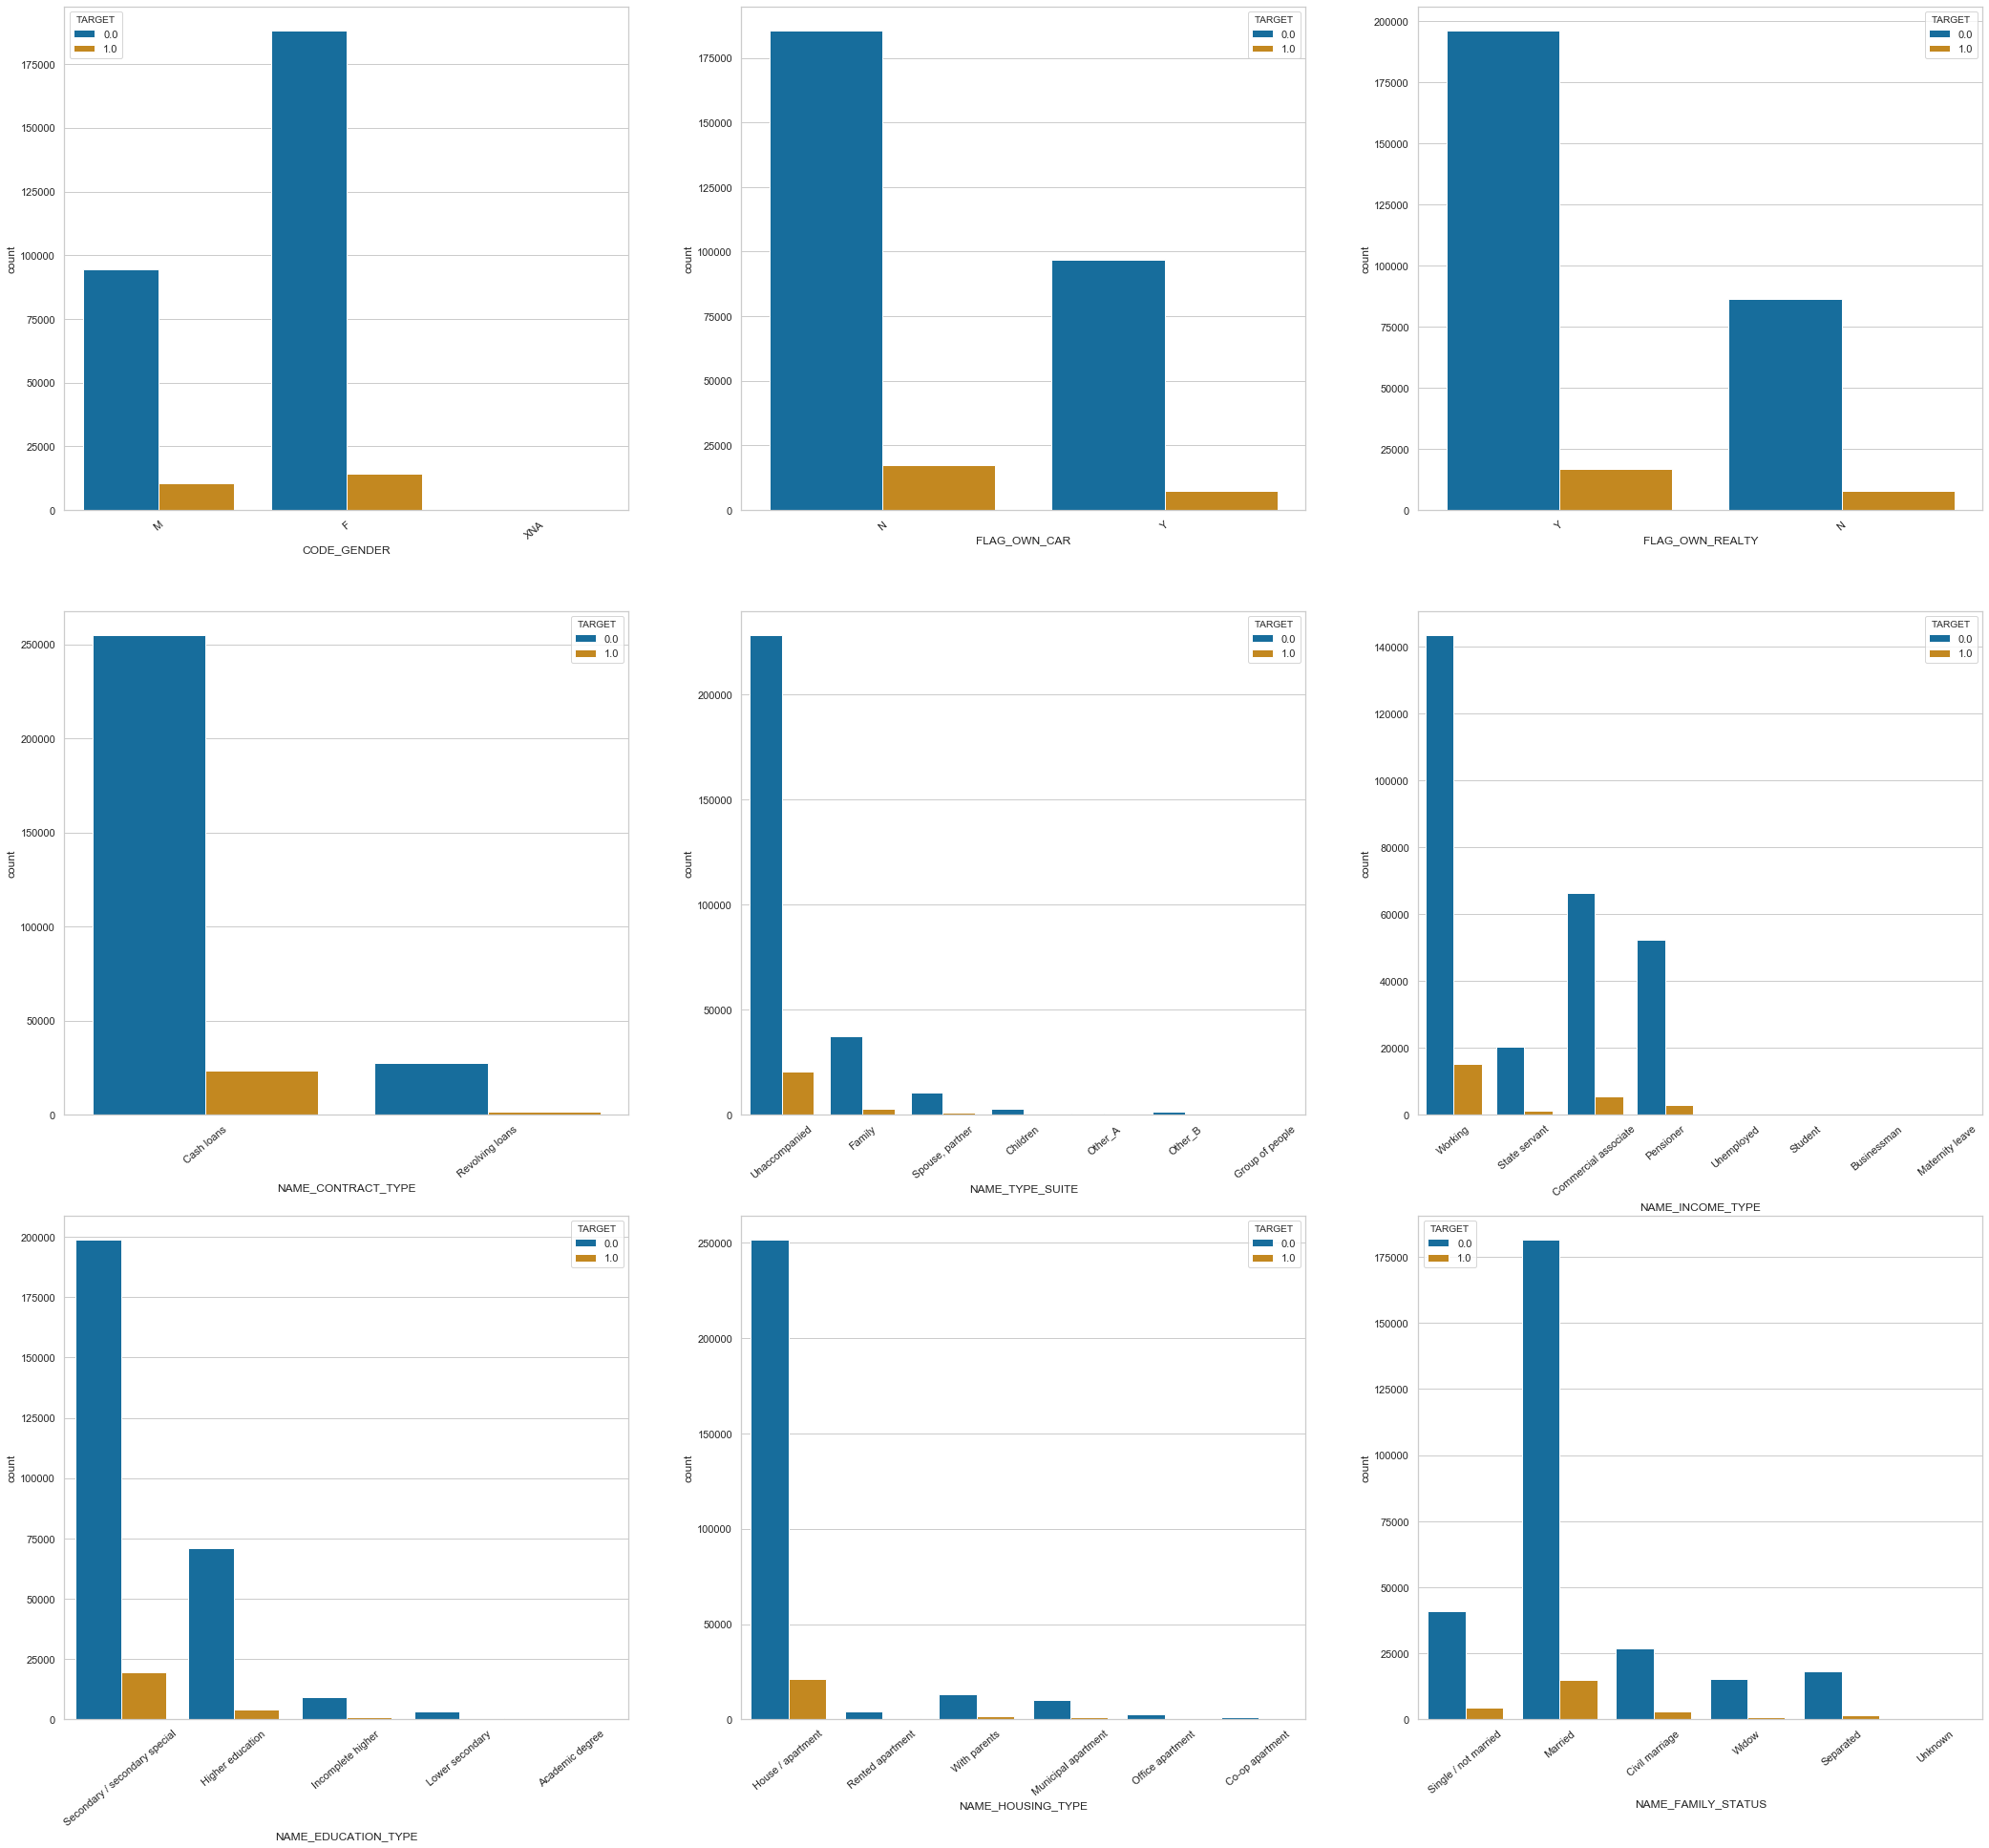

In [25]:
# Set up the matplotlib figure
f , axes = plt.subplots(nrows = 3,ncols=3, figsize=(36, 33))

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=40)

# Graph Gender (Male, Female, or Not Descibed)
sns.countplot(x='CODE_GENDER',hue = 'TARGET',data=master_df, ax=axes[0,0])

# Graph Loan for Car (Yes or No)
sns.countplot(x='FLAG_OWN_CAR',hue = 'TARGET',data=master_df, ax=axes[0,1])

# Graph Loan for Real Estate (Yes or No)
sns.countplot(x='FLAG_OWN_REALTY',hue = 'TARGET',data=master_df, ax=axes[0,2])

# Graph Type of Loan
sns.countplot(x='NAME_CONTRACT_TYPE',hue = 'TARGET', data=master_df, ax=axes[1,0])

# Graph Type of Suite
sns.countplot(x='NAME_TYPE_SUITE',hue = 'TARGET', data=master_df, ax=axes[1,1])

# Graph Income Source
sns.countplot(x='NAME_INCOME_TYPE',hue = 'TARGET', data=master_df, ax=axes[1,2])

# Graph Highest Education Received
sns.countplot(x='NAME_EDUCATION_TYPE',hue = 'TARGET', data=master_df, ax=axes[2,0])

# Graph Type of House Applied for a Loan
sns.countplot(x='NAME_HOUSING_TYPE',hue = 'TARGET', data=master_df, ax=axes[2,1])

# Graph Type of House Applied for a Loan
sns.countplot(x='NAME_FAMILY_STATUS',hue = 'TARGET', data=master_df, ax=axes[2,2])


As we see from the barcharts, there are some interesting facts here such as, more men have defaulted loans than women, more educated applicants have more loans than uneducated applicants, over 12% of workers have defaulted loans, and sale staff, drivers, and labors were top applicants who unpaid their loans.

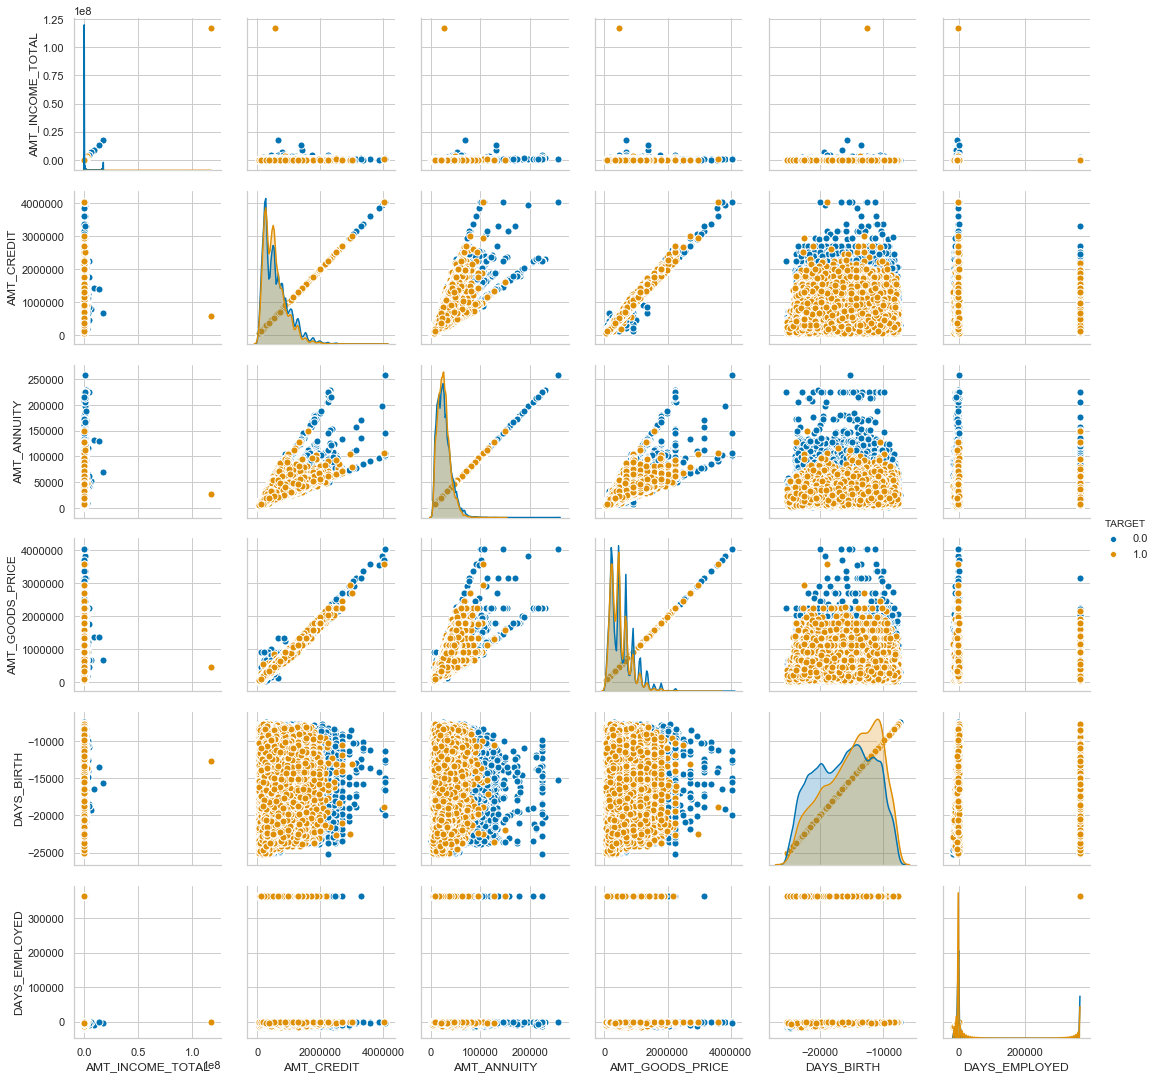

In [26]:
g = sns.pairplot(df,
                 vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                       'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED'],
                 hue='TARGET')
g.map(plt.scatter,s=50, edgecolor="white")

### Colleration Matrix
see the colleration between variables and the target

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,TARGET
SK_ID_CURR,1.000000,-0.001820,-0.000343,-0.000433,-0.000232,-0.001500,0.001366,-0.002108
AMT_INCOME_TOTAL,-0.001820,1.000000,0.156870,0.191657,0.159610,0.027261,-0.064223,-0.003982
AMT_CREDIT,-0.000343,0.156870,1.000000,0.770138,0.986968,-0.055436,-0.066838,-0.030369
AMT_ANNUITY,-0.000433,0.191657,0.770138,1.000000,0.775109,0.009445,-0.104332,-0.012817
AMT_GOODS_PRICE,-0.000232,0.159610,0.986968,0.775109,1.000000,-0.053442,-0.064842,-0.039645
DAYS_BIRTH,-0.001500,0.027261,-0.055436,0.009445,-0.053442,1.000000,-0.615864,0.078239
DAYS_EMPLOYED,0.001366,-0.064223,-0.066838,-0.104332,-0.064842,-0.615864,1.000000,-0.044932
TARGET,-0.002108,-0.003982,-0.030369,-0.012817,-0.039645,0.078239,-0.044932,1.000000


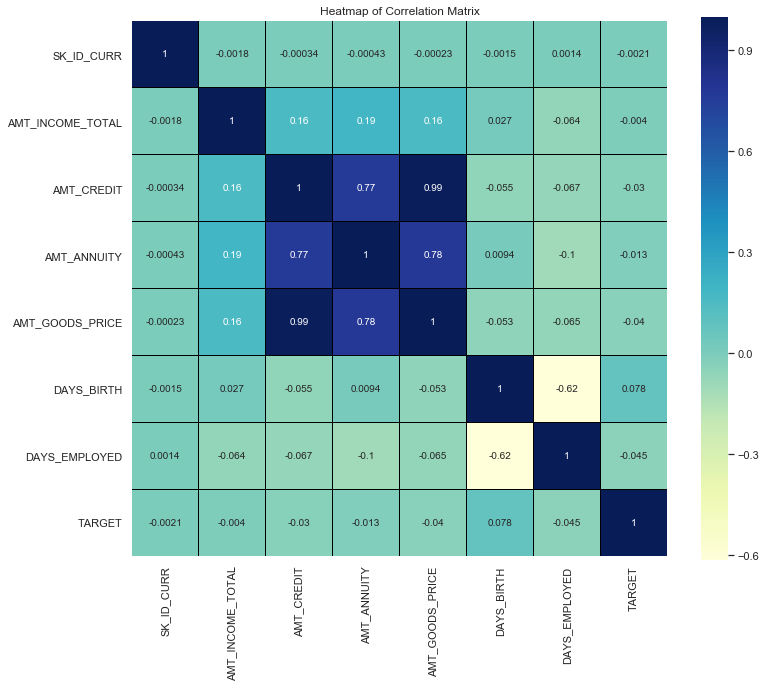

In [27]:
corr = df.corr()

# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(12, 10))
plt.title('Heatmap of Correlation Matrix')

# Draw the heatmap using seaborn
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=0.25,
            vmax=1.0, 
            square=True, 
            cmap="YlGnBu", 
            linecolor='black', 
            annot=True)

corr

As we can see from the heatmap, there are features where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner. 

The amount of credit and income and goods price are highly related. This explains the fact that higher income leads to higher spending, but also the wealthier you are, the easier it is to erase that debt. 

In [28]:
df.corr()['TARGET'].sort_values(ascending=False)

TARGET              1.000000
DAYS_BIRTH          0.078239
SK_ID_CURR         -0.002108
AMT_INCOME_TOTAL   -0.003982
AMT_ANNUITY        -0.012817
AMT_CREDIT         -0.030369
AMT_GOODS_PRICE    -0.039645
DAYS_EMPLOYED      -0.044932
Name: TARGET, dtype: float64

The DAYS_BIRTH strongly correlated with the TARGET. The correlation is positive, but the value of this feature is negative (the DAYS_BIRTH is the age in days of the client at the time of the loan in negative days). this indicates that as the client gets older, they are less likely to default on their loan (the target = 0).

# Part 3 - DEVELOP

<a id='feature'></a>
## ---- Engineer features  ----

### Create new features needed to potentially enhance model
From the days of birth, and we can create **AGE** variable.

In [29]:
master_df['AGE'] = master_df['DAYS_BIRTH'] / -365.25

From the days of employed, and we can create **YEARS_EMPLOYED** variable.

In [30]:
master_df.loc[master_df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
master_df['YEARS_EMPLOYED'] = master_df['DAYS_EMPLOYED'] / -365.25

In [31]:
# Summarize new features
new_features = ['AGE','YEARS_EMPLOYED']
master_df[new_features].describe(include = [np.number])

,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000
mean,43.906900,5.352082
std,11.947950,6.316410
min,20.503765,-0.000000
25%,33.984942,0.791239
50%,43.121150,3.321013
75%,53.886379,7.556468
max,69.073238,49.040383


In [32]:
#change the data type to match their categories
master_df[['AGE','YEARS_EMPLOYED']] = master_df[['AGE','YEARS_EMPLOYED']].astype(int)

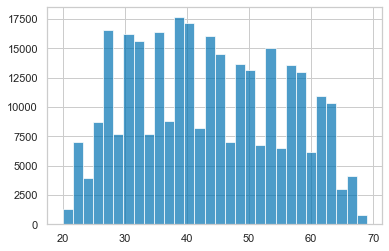

In [33]:
master_df['AGE'].hist(bins=30,alpha=0.7)

In [34]:
master_df['AGE'].corr(master_df['TARGET'])

-0.07819758613212167

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

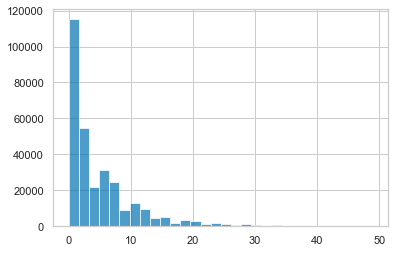

In [35]:
master_df['YEARS_EMPLOYED'].hist(bins=30,alpha=0.7)

In [36]:
master_df['YEARS_EMPLOYED'].corr(master_df['TARGET'])

-0.04784763912445765

There is a moderate negative linear relationship with the target meaning that as clients that stay longer in their job, they are more likely to repay their loans on time more often.

In [37]:
#drop the columns which are not needed in our models
master_df.drop(['OCCUPATION_TYPE','ORGANIZATION_TYPE','DAYS_EMPLOYED','DAYS_BIRTH',
                     'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

## Encoding categorical features

Before we go any further, we need to deal with categorical variables. Most machine learning model unfortunately cannot deal with categorical variables. Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model.
The main ways to carry out this process is label encoding. Label encoding assigns each unique category in a categorical variable with an integer. No new columns are created.

In [38]:
#Change the target to object data type
master_df['TARGET'] = master_df['TARGET'].astype(str)

In [39]:
# Number of unique classes in each object column
master_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

TARGET                        2
NAME_CONTRACT_TYPE            2
CODE_GENDER                   3
FLAG_OWN_CAR                  2
FLAG_OWN_REALTY               2
NAME_TYPE_SUITE               7
NAME_INCOME_TYPE              8
NAME_EDUCATION_TYPE           5
NAME_FAMILY_STATUS            6
NAME_HOUSING_TYPE             6
WEEKDAY_APPR_PROCESS_START    7
FONDKAPREMONT_MODE            4
HOUSETYPE_MODE                3
WALLSMATERIAL_MODE            7
EMERGENCYSTATE_MODE           2
dtype: int64

In [40]:
encode_df = master_df

In [42]:
# Create a label encoder object for any categorical variable (dtype == object) with 3 unique categories
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in encode_df:
    if encode_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(encode_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(encode_df[col])
            # Transform both training and testing data
            encode_df[col] = le.transform(encode_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [43]:
# one-hot encoding of categorical variables for any categorical variable with more than 2 unique categories
encode_df = pd.get_dummies(encode_df)

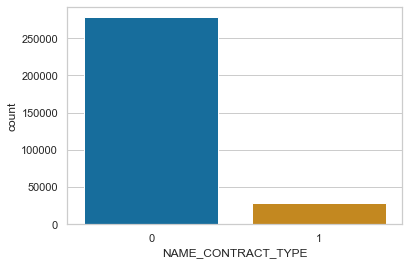

In [44]:
# Example categorical variable after label encoding
sns.countplot(encode_df['NAME_CONTRACT_TYPE'])

Above graph, we show example of a categorical variable that we assign each unique category with an integer. No new columns are created. 

In [45]:
encode_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


From the table above, we create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [ ]:
# save the data
#encode_df.to_csv('cleaned_data.csv', index = False)

<a id='split'></a>
## ---- Split Train/Test Set ----

Split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [46]:
# Load the data
df = pd.read_csv ('/Users/jill_jewelry/Documents/Github/Predicting-Home-Credit-Clients-Repayment-Abilities/cleaned_data.csv')

In [48]:
# y Labels are the values we want to predict
y = np.array(df['TARGET'])

# Remove the labels from the features
# axis 1 refers to the columns
X = df.drop('TARGET', axis = 1)

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    stratify=y)

In [49]:
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Features Shape: (215257, 146)
Training Target Shape: (215257,)
Testing Features Shape: (92254, 146)
Testing Target Shape: (92254,)


## ---- Establish Baseline ----

Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. 

To get the bestline, all of the features after encoding the categorical variables will be filled with median values (imputation) and normalized the range of the features (feature scaling). 

For a naive baseline, we are asked to predict the probability of not repaying the loan, so we would guess 0.5 for all observations on the test set. This will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition (random guessing on a classification task will score a 0.5).

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
  
# Feature names
features = list(X_train.columns)

# Median imputation of missing values
imputer = SimpleImputer(missing_values=np.nan,strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X_train)
train = scaler.transform(X_train)
test = scaler.transform(X_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 146)
Testing data shape:  (92254, 146)


<a id='model'></a>
## ---- Train Models ----

### Logistic Regression
Logistic Regression F1 Score (0.92)

In [51]:
print ("\n\n ---Logistic Regression Model---")

# Make the Logistic Regression model
lr = LogisticRegression()

# Fit the model to the train data
lr.fit(X_train,y_train)

# Evaluation
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr_predictions = lr.predict(X_test)
print(classification_report(y_test,lr_predictions))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.50
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



### Decision Tree

Decision Tree F1 Score (0.84)

In [52]:
print ("\n\n ---Decision Tree Model---")

# Make the Logistic Regression model
dtree = DecisionTreeClassifier()

# Fit the model to the train data
dtree.fit(X_train,y_train)

# Evaluation
dtree_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % dtree_auc)

predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))



 ---Decision Tree Model---
Logistic Regression AUC = 0.54
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     84806
           1       0.14      0.16      0.15      7448

    accuracy                           0.85     92254
   macro avg       0.53      0.54      0.53     92254
weighted avg       0.86      0.85      0.86     92254



<a id='forest'></a>
### Random Forest Classifier

Random Forest Classifier F1 Score (0.92)

In [53]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Make the random forest model (instantiate model with 100 decision trees)
rf = RandomForestClassifier(
    random_state=42)

# Apply 5-Fold Cross Validation
rf_result = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')

rf_result.mean()

0.021598283378169728

In [54]:
print ("\n\n ---Random Forest Model---")

# Train the model
rf.fit(X_train, y_train)

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)

print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.51
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.41      0.01      0.02      7448

    accuracy                           0.92     92254
   macro avg       0.66      0.51      0.49     92254
weighted avg       0.88      0.92      0.88     92254



<a id='grad'></a>
### 4. Gradient Boosting Classifier
Gradient Boosting Classifier F1 Score (0.92)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  

gbc = gbc.fit(X_train,y_train)

# Apply 5-Fold Cross Validation
gbc_result = cross_val_score(gbc, X_train, y_train, cv=5, scoring='f1')
gbc_result.mean()

0.02165276710952341

In [58]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.51
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.58      0.01      0.02      7448

    accuracy                           0.92     92254
   macro avg       0.75      0.51      0.49     92254
weighted avg       0.89      0.92      0.88     92254



<a id='roc'></a>
### ROC Graph

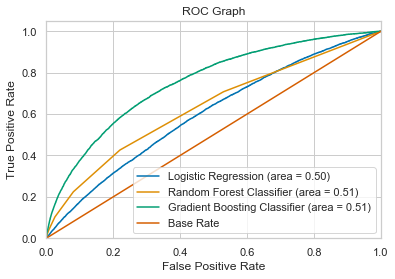

In [59]:
# Create ROC Graph
from sklearn.metrics import roc_curve
lr_fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(lr_fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

<a id='conf'></a>
### Confusion Matrix

In [60]:
# Confusion Matrix for Linear Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[84804,     2],
       [ 7448,     0]])

In [61]:
# Confusion Matrix for Random Forest Regresion
confusion_matrix(y_test, rf.predict(X_test))

array([[84666,   140],
       [ 7352,    96]])

In [62]:
# Confusion Matrix for Gradient Boosting 
confusion_matrix(y_test, gbc.predict(X_test))

array([[84739,    67],
       [ 7357,    91]])